In [149]:

git commit -m "first commit"
git remote add origin https://github.com/MuhammadSananAkbar/Python-Projects.git
git push -u origin master

SyntaxError: invalid syntax (<ipython-input-149-2116a5f6d2b4>, line 1)

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Joining Data

In [79]:
data1 = pd.read_csv('Final_Dataset.csv')

In [80]:
data2 = pd.read_csv('taxi+_zone_lookup.csv')
data2.head()

,LocationID,Borough,Zone,service_zone,Latitude,Longitude
0,1,EWR,Newark Airport,EWR,40.689064,-74.177255
1,2,Queens,Jamaica Bay,Boro Zone,40.749824,-73.797634
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,40.850485,-73.840404
3,4,Manhattan,Alphabet City,Yellow Zone,40.789624,-73.959894
4,5,Staten Island,Arden Heights,Boro Zone,40.583456,-74.149605


In [81]:
data2.rename(columns={'LocationID':'PULocationID'},inplace=True)

In [82]:
data2.head()

,PULocationID,Borough,Zone,service_zone,Latitude,Longitude
0,1,EWR,Newark Airport,EWR,40.689064,-74.177255
1,2,Queens,Jamaica Bay,Boro Zone,40.749824,-73.797634
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,40.850485,-73.840404
3,4,Manhattan,Alphabet City,Yellow Zone,40.789624,-73.959894
4,5,Staten Island,Arden Heights,Boro Zone,40.583456,-74.149605


In [102]:
data = pd.merge(data1,data2, on = ['PULocationID'])

In [103]:
data.drop(['DOLocationID','Unnamed: 1','Borough','Zone','service_zone','PULocationID','weekday'],axis=1,inplace=True)

In [104]:
data.head()

,passenger_count,trip_distance,fare_amount,hour,day_of week,Latitude,Longitude
0,2,3.80,19.0,17,Wednesday,40.789624,-73.959894
1,1,1.40,13.0,11,Monday,40.789624,-73.959894
2,2,1.67,7.5,23,Tuesday,40.789624,-73.959894
3,1,2.20,9.0,20,Wednesday,40.789624,-73.959894
4,1,0.80,7.5,9,Monday,40.789624,-73.959894


# Data Exploration

(array([9.015e+03, 6.370e+02, 3.290e+02, 1.300e+01, 3.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  2.5 ,  24.95,  47.4 ,  69.85,  92.3 , 114.75, 137.2 , 159.65,
        182.1 , 204.55, 227.  ]),
 <a list of 10 Patch objects>)

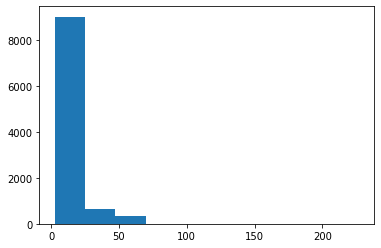

In [106]:
plt.hist(data['fare_amount'])

In [107]:
data['fare_amount'].describe()

count    10000.000000
mean        12.646781
std         11.098479
min          2.500000
25%          6.500000
50%          9.000000
75%         13.500000
max        227.000000
Name: fare_amount, dtype: float64

In [109]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
data1.loc[data['fare_amount'].idxmax()]

PULocationID           246
Unnamed: 1            4482
passenger_count          3
trip_distance      0.95000
DOLocationID            50
fare_amount        5.00000
weekday                  1
hour                    21
day_of week        Tuesday
Name: 4482, dtype: object

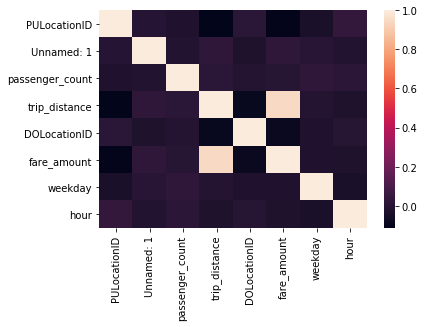

In [110]:
sns.heatmap(data1.corr(),annot=False)

Text(0.5, 1.0, 'Distribution of fare amount')

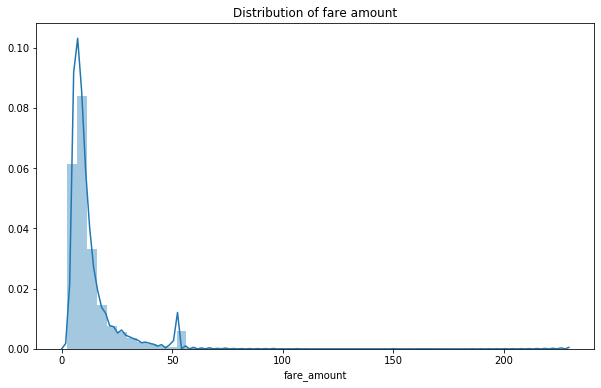

In [113]:
plt.figure(figsize=(10,6))
sns.distplot(data['fare_amount'])
plt.title('Distribution of fare amount')

In [115]:
data.groupby(['passenger_count']).size()

passenger_count
1    7190
2    1500
3     397
4     208
5     457
6     248
dtype: int64

Text(0.5, 1.0, 'Average Fare Price During Time of Day')

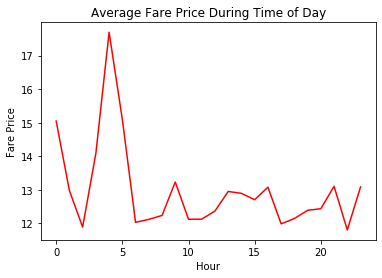

In [119]:
time_of_day=data.groupby(['hour']).mean()
plt.plot(time_of_day.index, time_of_day.fare_amount, color = 'r')
plt.xlabel('Hour');
plt.ylabel('Fare Price');
plt.title('Average Fare Price During Time of Day')

# Data Transformation

In [120]:
def weekend(x):
    if x == 'Saturday':
        return 1
    elif x == 'Sunday':
        return 1
    else:
        return 0

In [121]:
data['weekend'] = data['day_of week'].apply(weekend)

In [122]:
data.drop('day_of week',axis=1,inplace=True)

In [123]:
def hour(x):
    if x in range(6,19):
        return 1
    else:
        return 0

In [124]:
data['daytime'] = data['hour'].apply(hour)
data.drop('hour',axis=1,inplace=True)

In [125]:
data.to_csv (r'C:\Users\sanna\OneDrive\UConn\Semester 2\DS with Python\Project\Joined_Data.csv', index = False, header=True)


# Regression Using OLS

In [126]:
data.head()

,passenger_count,trip_distance,fare_amount,Latitude,Longitude,weekend,daytime
0,2,3.80000,19.00000,40.78962,-73.95989,0,1
1,1,1.40000,13.00000,40.78962,-73.95989,0,1
2,2,1.67000,7.50000,40.78962,-73.95989,0,0
3,1,2.20000,9.00000,40.78962,-73.95989,0,0
4,1,0.80000,7.50000,40.78962,-73.95989,0,1


In [127]:
import statsmodels.api as sm

In [128]:
X = sm.add_constant(data.drop('fare_amount',axis=1))

C:\Users\sanna\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [129]:
y = data['fare_amount']

In [130]:
model = sm.OLS(y,X)

In [131]:
results = model.fit()

In [132]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 1.506e+04
Date:                Thu, 16 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:01:06   Log-Likelihood:                -26722.
No. Observations:               10000   AIC:                         5.346e+04
Df Residuals:                    9993   BIC:                         5.351e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             160.5010     45.124      3.557      0.000      72.049     248.953
passenger_count    -0.0712      0.029     -2.476      0.013      -0.128      -0.015
trip_distance       2.7513      0.009    300.032      0.000       2.733       2.769
Latitude           -7.9141      2.360     -3.353      0.001     -12.541      -3.288
Longitude          -2.2501      0.692     -3.254      0.001      -3.606      -0.895
weekend            -0.4180      0.082     -5.124      0.000      -0.578      -0.258
daytime             0.8792      0.074     11.887      0.000       0.734       1.024
==============================================================================
Omnibus:                    15867.815   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         22523505.393
Skew:                           9.894   Prob(JB):                         0.00
Kurtosis:                     234.657   Cond. No.                     1.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
from statsmodels.tools.eval_measures import rmse


# Regression Using  Numpy

In [134]:
b = np.dot(np.linalg.inv(np.dot(X.T, X)),np.dot(X.T,y))
SSE = np.dot((results.predict() - y.mean()).T,(results.predict() - y.mean()))
resid = y-results.predict()
SSR = np.dot(resid.T,resid)
SST = SSR + SSE
R2 = SSE/SST
print('The R2 using Linear Regession with Numpy is', R2)


The R2 using Linear Regession with Numpy is 0.9004346075194541


# Linear Regression using Sklearn

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(data.drop('fare_amount',axis=1),data['fare_amount'],random_state=0,test_size=0.5)
lr=LinearRegression()
lr.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error,r2_score
y_lr=lr.predict(X_test)
print('The R squared using linear regression using Sklearn is',r2_score(y_test,y_lr))

print('The RMSE for test set using linear regression using Sklearn is',mean_squared_error(y_test,y_lr))
print('The RMSE for training using linear regression using Sklearn is',mean_squared_error(y_train,lr.predict(X_train)))



The R squared using linear regression using Sklearn is 0.8948481655890659
The RMSE for test set using linear regression using Sklearn is 14.014116366042543
The RMSE for training using linear regression using Sklearn is 10.593960973923686


# K-Fold Cross Validation

In [136]:
## KFold cross-validation

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

## Define variables for the for loop

kf = KFold(n_splits=10)
RMSE_sum=0
RMSE_length=10
X = np.array(data.drop('fare_amount',axis=1))
y = np.array(data['fare_amount'])

for loop_number, (train, test) in enumerate(kf.split(X)):

    ## Get Training Matrix and Vector

    training_X_array = X[train]
    training_y_array = y[train].reshape(-1, 1)

    ## Get Testing Matrix Values

    X_test_array = X[test]
    y_actual_values = y[test]

    ## Fit the Linear Regression Model

    lr_model = LinearRegression().fit(training_X_array, training_y_array)

    ## Compute the predictions for the test data

    prediction = lr_model.predict(X_test_array)      
    predicted_amount = np.array(prediction)   

    ## Calculate the RMSE

    RMSE_cross_fold = np.sqrt(mean_squared_error(y_actual_values, predicted_amount))

    ## Add each RMSE_cross_fold value to the sum

    RMSE_sum=RMSE_cross_fold+RMSE_sum

## Calculate the average and print    

RMSE_cross_fold_avg=RMSE_sum/RMSE_length

print('The Mean RMSE across all folds is',RMSE_cross_fold_avg)

The Mean RMSE across all folds is 41.294522380516284


# Random Forest Regressor

In [137]:
from sklearn.ensemble import RandomForestRegressor
randomForesttrain=RandomForestRegressor(random_state=0)
randomForesttrain.fit(X_train,y_train)
randomForesttrain_mse=mean_squared_error(y_train,randomForesttrain.predict(X_train))
print('The RMSE  of training set is',np.sqrt(randomForesttrain_mse))##Print RMSE of training set
print('The R squared of training is',r2_score(y_train,randomForesttrain.predict(X_train)))##Print r-square of training set
randomForesttest_mse=mean_squared_error(y_test,randomForesttrain.predict(X_test))
print('The RMSE  of test set is',np.sqrt(randomForesttest_mse))##Print RMSE of test set
RamdomForestRMSE=np.sqrt(randomForesttest_mse)
print('The R squared of test set is',r2_score(y_test,randomForesttrain.predict(X_test)))##Print r-square of test set

The RMSE  of training set is 1.7317321641833632
The R squared of training is 0.9734733967572545
The RMSE  of test set is 3.9717550722498376
The R squared of test set is 0.8816369760941687


C:\Users\sanna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Ridge Regression using L2 Penalty


In [138]:
from sklearn.linear_model import Ridge
rid=Ridge().fit(X_train,y_train)
print(np.sqrt(mean_squared_error(y_train,rid.predict(X_train))))###Train RMSE
print(np.sqrt(mean_squared_error(y_test,rid.predict(X_test))))### Test RMSE

##OLS Training RMSE:3.0737185121831163
###OLS Validation RMSE:3.662116393418766

3.2562935336958367
3.741205447612439


# Lasso Regression using L1 Penalty


In [139]:
from sklearn.linear_model import Lasso
las=Lasso().fit(X_train,y_train)
print(np.sqrt(mean_squared_error(y_train,las.predict(X_train))))###Train RMSE
print(np.sqrt(mean_squared_error(y_test,las.predict(X_test))))### Test RMSE



3.3009667799734634
3.8123578625134877


# Gradient Boosting Regressor

In [141]:
from sklearn.ensemble import GradientBoostingRegressor
model_gradient=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=0)
gradientBoost=model_gradient.fit(X_train,y_train)

predicted=model_gradient.predict(X_test)

print('Test RMSE',np.sqrt(mean_squared_error(y_test,predicted)))### Test RMSE
GRMSE=np.sqrt(mean_squared_error(y_test,predicted))
print('GRMSE:',GRMSE)
print('Training RMSE',np.sqrt(mean_squared_error(y_train,model_gradient.predict(X_train))))##Training RMSE

Test RMSE 3.5150997009391114
GRMSE: 3.5150997009391114
Training RMSE 2.4544734425987182


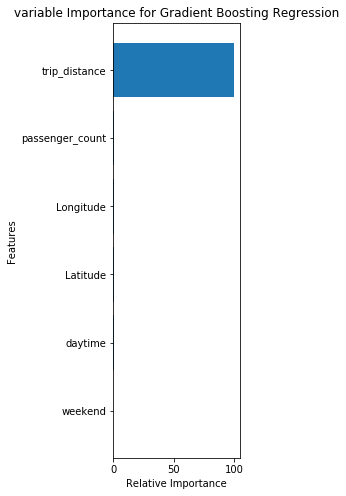

In [140]:
feature_importance=gradientBoost.feature_importances_
#make importances relative to max importance
feature_importance=100.0*(feature_importance/feature_importance.max())
sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(5,8))
plt.subplot(1,2,2)
plt.barh(pos,feature_importance[sorted_idx],align='center')
plt.yticks(pos,X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('variable Importance for Gradient Boosting Regression')
plt.show()